<a href="https://colab.research.google.com/github/bamyers2/tantiger/blob/main/01Summer2021Finalv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import csv

Using TensorFlow backend.


In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
age_data = pd.read_csv('gdrive/My Drive/age_gender.csv')

In [5]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [6]:
def label_age (row):
    if row['age'] > 0 and row['age'] < 3:
        return 0
    elif row['age'] > 2 and row['age'] < 10:
        return 1
    elif row['age'] > 9 and row['age'] < 21:
        return 2
    elif row['age'] > 20 and row['age'] < 26:
        return 3
    elif row['age'] > 25 and row['age'] < 28:
        return 4
    elif row['age'] > 27 and row['age'] < 32:
        return 5
    elif row['age'] > 31 and row['age'] < 37:
        return 6
    elif row['age'] > 36 and row['age'] < 46:
        return 7
    elif row['age'] > 45 and row['age'] < 55:
        return 8
    elif row['age'] > 54 and row['age'] < 66:
        return 9
    else:
        return 10

In [7]:
age_data['AgeGroup'] = age_data.apply (lambda row: label_age(row), axis=1)

In [8]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels,AgeGroup
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0


In [9]:
X = []
y = []
for index, row in age_data.iterrows():
    k = row['pixels'].split(" ")
    X.append(np.array(k))
    y.append(row['AgeGroup'])
        
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.93, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.32/0.6 , random_state=42)

In [10]:
len(X_valid)/(len(X_train)+len(X_valid)+len(X_test))

0.07002742037544822

In [11]:
len(X_train)/(len(X_train)+len(X_valid)+len(X_test))

0.4959713140687619

In [12]:
len(X_test)/(len(X_train)+len(X_valid)+len(X_test))

0.43400126555578994

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train1 = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid1 = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test1 = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train1 = np_utils.to_categorical(y_train, num_classes = 11)
y_valid1 = np_utils.to_categorical(y_valid, num_classes = 11)
y_test1 = np_utils.to_categorical(y_test, num_classes = 11)

In [14]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [15]:
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train1, y_train1, batch_size=32, epochs=7, verbose=1, validation_data=(X_valid1, y_valid1))


Train on 11757 samples, validate on 1660 samples
Epoch 1/7
11757/11757 [==============================] - 30s 3ms/step - loss: 2.3782 - accuracy: 0.1169 - val_loss: 2.3586 - val_accuracy: 0.1247
Epoch 2/7
11757/11757 [==============================] - 27s 2ms/step - loss: 2.3448 - accuracy: 0.1206 - val_loss: 2.2982 - val_accuracy: 0.1506
Epoch 3/7
11757/11757 [==============================] - 27s 2ms/step - loss: 2.2844 - accuracy: 0.1568 - val_loss: 2.2592 - val_accuracy: 0.1614
Epoch 4/7
11757/11757 [==============================] - 27s 2ms/step - loss: 2.1496 - accuracy: 0.1923 - val_loss: 2.0280 - val_accuracy: 0.2259
Epoch 5/7
11757/11757 [==============================] - 27s 2ms/step - loss: 1.9845 - accuracy: 0.2438 - val_loss: 1.8814 - val_accuracy: 0.2633
Epoch 6/7
11757/11757 [==============================] - 27s 2ms/step - loss: 1.8708 - accuracy: 0.2783 - val_loss: 1.9333 - val_accuracy: 0.2422
Epoch 7/7
11757/11757 [==============================] - 27s 2ms/step - lo

In [17]:
Y_test1 = np.argmax(y_test1, axis=1)
y_pred1 = model.predict_classes(X_test1)
target_names = ['1-2', '3-9', '10-20', '21-25', '26-27', '28-31', '32-36', '37-45', '46-54', '55-65', '66-116']
print(classification_report(Y_test1, y_pred1, target_names = target_names))

              precision    recall  f1-score   support

         1-2       0.59      0.95      0.73       736
         3-9       0.23      0.39      0.29       635
       10-20       0.19      0.22      0.20       787
       21-25       0.30      0.35      0.32      1174
       26-27       0.25      0.00      0.01      1245
       28-31       0.18      0.04      0.06      1081
       32-36       0.19      0.19      0.19      1116
       37-45       0.19      0.05      0.07      1095
       46-54       0.17      0.35      0.23       865
       55-65       0.23      0.15      0.18       848
      66-116       0.33      0.81      0.47       706

    accuracy                           0.28     10288
   macro avg       0.26      0.32      0.25     10288
weighted avg       0.25      0.28      0.22     10288



In [18]:
cm = confusion_matrix(y_test1.argmax(axis=1), y_pred1)
print(cm)

[[700  25   0   2   0   0   1   0   2   0   6]
 [354 249  12   8   0   0   2   0   1   0   9]
 [ 48 265 177 144   1  12  51   5  43  11  30]
 [  7 132 240 408   5  55 161  20 110  17  19]
 [ 16 119 167 334   5  51 256  41 175  26  55]
 [  6  86 130 226   3  39 222  55 233  33  48]
 [  6  61 100 143   5  29 207  72 339  73  81]
 [  7  48  63  49   1  20 137  50 442 107 171]
 [  6  36  33  16   0   9  48  15 304 120 278]
 [  8  40  12   9   0   3  19   8 154 123 472]
 [ 25  25   9   1   0   0   3   1  34  35 573]]


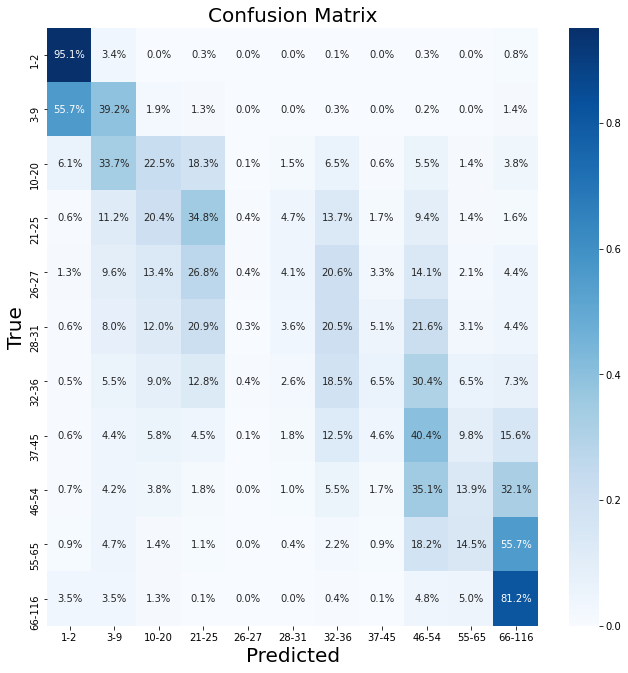

In [19]:
fig,ax= plt.subplots(figsize=(11,11))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
#sns.heatmap(cm, annot=True, fmt='.0f',cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);

In [20]:
pred = model.predict(X_test1)
pred1 = np.where(pred==1)
TP_Indexes = []
for k in pred1[0]:
    if(y_test1[k][0] == 1):
        TP_Indexes.append(k)
X_test1_TP = X_test1[TP_Indexes]

In [21]:
aa = pd.DataFrame(y_pred1)
# aa2 = pd.DataFrame(pred1)
# aa3 = pd.DataFrame(TP_Indexes)
# aa4 = pd.DataFrame(X_test1_TP)

In [22]:
aa.head()

,0
0,6
1,3
2,8
3,8
4,0


In [23]:
aaFinal = pd.DataFrame(y_test1)

In [24]:
aaFinal[0].values[1]

0.0

In [25]:
aaFinal['aa'] = aa[0]

In [26]:
aaFinal.head()

,0,1,2,3,4,5,6,7,8,9,10,aa
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
def label_age (row):
    if row[row['aa']] == 1.0:
        return 1
    else:
        return 0

In [28]:
aaFinal['YorN'] = aaFinal.apply (lambda row: label_age(row), axis=1)

In [29]:
aaFinal.head()

,0,1,2,3,4,5,6,7,8,9,10,aa,YorN
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [30]:
aaFinal.shape[0]

10288

In [31]:
X_test22 = X_test.tolist()

In [32]:
con = 0
for i in range(aaFinal.shape[0]):
    if aaFinal['YorN'].values[i] == 0:
        X_test22.remove(X_test22[i-con])
        con += 1

In [33]:
X_test22 = np.array(X_test22)

In [34]:
X_test22[0]

array(['239', '139', '223', ..., '233', '230', '237'], dtype='<U3')

In [35]:
X_test[1]

array(['36', '33', '32', ..., '28', '31', '25'], dtype='<U3')

In [36]:
X_test22 = X_test22.tolist()

In [37]:
X_test23 = X_test22

In [38]:
len(X_test22)

2835

In [39]:
div = int(round(len(X_test22) * .1, 0))

In [40]:
div

284

In [41]:
val = random.sample(X_test22, div)

In [42]:
train0 = []

for i in X_test22:
    if i not in val:
        train0.append(i)

In [43]:
val0 = []

for i in X_test22:
    if i in val:
        val0.append(i)

In [44]:
len(train0)/len(val0)

8.982394366197184

In [45]:
y_test22 = y_test.tolist()

In [46]:
y_train0 = []
y_val0 = []

for i in val0:
    y_val0.append(y_test22[X_test23.index(i)])

for i in train0:
    y_train0.append(y_test22[X_test23.index(i)])

In [47]:
len(y_train0)/len(y_val0)

8.982394366197184

In [48]:
train00 = pd.read_csv('gdrive/My Drive/train0.csv')
val00 = pd.read_csv('gdrive/My Drive/val0.csv')
y_train00 = pd.read_csv('gdrive/My Drive/y_train0.csv')
y_val00 = pd.read_csv('gdrive/My Drive/y_val0.csv')
test00 = pd.read_csv('gdrive/My Drive/test0.csv')
y_test00 = pd.read_csv('gdrive/My Drive/y_test0.csv')

In [49]:
train00 = train00.values.tolist()
val00 = val00.values.tolist()
y_train00 = y_train00.values.tolist()
y_val00 = y_val00.values.tolist()
test00 = test00.values.tolist()
y_test00 = y_test00.values.tolist()

In [50]:
print("train00: %s" %len(train00))
print("val00: %s" %len(val00))
print("test00: %s" %len(test00))

train00: 729
val00: 81
test00: 18963


In [51]:
y_train0 = y_train0 + y_train00
y_val0 = y_val0 + y_val00
train0 = train0 + train00
val0 = val0 + val00

In [52]:
X_test = X_train.tolist()
y_test = y_train.tolist()

In [53]:
count = 0
for i in range(len(train0)):
  if train0[i] in X_test:
    y_test.remove(y_test[X_test.index(train0[i])])
    X_test.remove(train0[i])
    count += 1
  
for i in range(len(val0)):
  if val0[i] in X_test:
    y_test.remove(y_test[X_test.index(val0[i])-1])
    X_test.remove(val0[i])

In [54]:
print("train0: %s" %len(train0))
print("val0: %s" %len(val0))
print("test0: %s" %len(X_test))
print("y_train0: %s" %len(y_train0))

train0: 3280
val0: 365
test0: 11715
y_train0: 3280


In [55]:
train0 = pd.DataFrame(train0)
val0 = pd.DataFrame(val0)

In [56]:
#y_train2 = pd.DataFrame(y_train0 + y_train00)

In [57]:
y_train0 = pd.DataFrame(y_train0)

In [58]:
#y_val2 = pd.DataFrame(y_val0 + y_val00)

In [59]:
y_val0 = pd.DataFrame(y_val0)

In [60]:
train0.to_csv('train0.csv', index=False)
val0.to_csv('val0.csv', index=False)
y_train0.to_csv('y_train0.csv', index=False)
y_val0.to_csv('y_val0.csv', index=False)

In [61]:
test0 = pd.DataFrame(X_test)
y_test0 = pd.DataFrame(y_test)

In [62]:
test0.to_csv('test0.csv', index=False)
y_val0.to_csv('y_val0.csv', index=False)
y_test0.to_csv('y_test0.csv', index=False)

In [63]:
len(X_test)/len(y_test)
#should be 1

1.0

In [64]:
this is an error

SyntaxError: ignored

In [ ]:
X_train = np.array(train0)
y_train = np.array(y_train0)
X_valid = np.array(val0)
y_valid = np.array(y_val0)
X_test = np.array(X_train)
y_test = np.array(y_train)

X_train1 = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid1 = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test1 = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train1 = np_utils.to_categorical(y_train, num_classes = 11)
y_valid1 = np_utils.to_categorical(y_valid, num_classes = 11)
y_test1 = np_utils.to_categorical(y_test, num_classes = 11)

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

In [ ]:
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train1, y_train1, batch_size=2, epochs=30, verbose=1, validation_data=(X_valid1, y_valid1))

In [ ]:
Y_test1 = np.argmax(y_test1, axis=1)
y_pred1 = model.predict_classes(X_test1)
target_names = ['1-2', '3-9', '10-20', '21-25', '26-27', '28-31', '32-36', '37-45', '46-54', '55-65', '66-116']
print(classification_report(Y_test1, y_pred1, target_names = target_names))

In [ ]:
cm = confusion_matrix(y_test1.argmax(axis=1), y_pred1)
print(cm)

In [ ]:
fig,ax= plt.subplots(figsize=(12,12))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
#sns.heatmap(cm, annot=True, fmt='.0f',cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);

In [ ]:
#con = 0
#for i in range(aaFinal.shape[0]-1):
#    if aaFinal['YorN'].values[i] == 0:
#        X_test = np.delete(X_test, i-con)
#        con += 1